# 0. Setup Paths

In [12]:
import os

In [13]:
CUSTOM_MODEL_NAME = 'mainModel02' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8'
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [14]:
workspace = 'workspaceInnot'
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', workspace),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', workspace,'annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', workspace,'images'),
    'MODEL_PATH': os.path.join('Tensorflow', workspace,'models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', workspace,'pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', workspace,'models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', workspace,'models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', workspace,'models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', workspace,'models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [15]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', workspace,'models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [16]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [17]:
files

{'PIPELINE_CONFIG': 'Tensorflow/workspaceInnot/models/mainModel02/pipeline.config',
 'TF_RECORD_SCRIPT': 'Tensorflow/scripts/generate_tfrecord.py',
 'LABELMAP': 'Tensorflow/workspaceInnot/annotations/label_map.pbtxt'}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [7]:
# https://www.tensorflow.org/install/source_windows

In [10]:
if os.name=='nt':
    !pip install wget
    import wget

In [11]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [10]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

/bin/bash: Zeile 1: apt-get: Kommando nicht gefunden.
Processing /home/simon/Simon/Hochschule/Innot/TFODCourse/Tensorflow/models/research
  Preparing metadata (setup.py) ... done


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1664640 sha256=c79253c61ac1368d7c34d028e7b34663e4dcaf1096880627f3b2c509de914e73
  Stored in directory: /tmp/pip-ephem-wheel-cache-q0b89_s7/wheels/fe/99/de/7accc5914ac24b853caed310c7584852a452cbd099de73926c
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [36]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

2022-05-04 00:10:56.519519: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 00:10:56.519535: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-04 00:10:57.877971: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-04 00:10:57.878156: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-04 00:10:57.878182: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul): 0.04s
I0504 00:10:59.362385 140246354925376 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul): 0.04s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_with_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.04s
I0504 00:10:59.399160 140246354925376 test_util.py:2373] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.04s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.te

I0504 00:11:00.791207 140246354925376 efficientnet_model.py:144] round_filter input=32 output=32
I0504 00:11:00.791264 140246354925376 efficientnet_model.py:144] round_filter input=16 output=16
I0504 00:11:00.835570 140246354925376 efficientnet_model.py:144] round_filter input=16 output=16
I0504 00:11:00.835640 140246354925376 efficientnet_model.py:144] round_filter input=24 output=24
I0504 00:11:00.920077 140246354925376 efficientnet_model.py:144] round_filter input=24 output=24
I0504 00:11:00.920152 140246354925376 efficientnet_model.py:144] round_filter input=40 output=48
I0504 00:11:01.008179 140246354925376 efficientnet_model.py:144] round_filter input=40 output=48
I0504 00:11:01.008254 140246354925376 efficientnet_model.py:144] round_filter input=80 output=88
I0504 00:11:01.206413 140246354925376 efficientnet_model.py:144] round_filter input=80 output=88
I0504 00:11:01.206484 140246354925376 efficientnet_model.py:144] round_filter input=112 output=120
I0504 00:11:01.327767 140246

I0504 00:11:02.902462 140246354925376 efficientnet_model.py:144] round_filter input=80 output=112
I0504 00:11:02.902556 140246354925376 efficientnet_model.py:144] round_filter input=112 output=160
I0504 00:11:03.195093 140246354925376 efficientnet_model.py:144] round_filter input=112 output=160
I0504 00:11:03.195166 140246354925376 efficientnet_model.py:144] round_filter input=192 output=272
I0504 00:11:03.481552 140246354925376 efficientnet_model.py:144] round_filter input=192 output=272
I0504 00:11:03.481628 140246354925376 efficientnet_model.py:144] round_filter input=320 output=448
I0504 00:11:03.554146 140246354925376 efficientnet_model.py:144] round_filter input=1280 output=1792
I0504 00:11:03.569806 140246354925376 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides

I0504 00:11:06.499092 140246354925376 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b7
I0504 00:11:06.499168 140246354925376 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 384
I0504 00:11:06.499192 140246354925376 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 8
I0504 00:11:06.499868 140246354925376 efficientnet_model.py:144] round_filter input=32 output=64
I0504 00:11:06.506445 140246354925376 efficientnet_model.py:144] round_filter input=32 output=64
I0504 00:11:06.506518 140246354925376 efficientnet_model.py:144] round_filter input=16 output=32
I0504 00:11:06.599472 140246354925376 efficientnet_model.py:144] round_filter input=16 output=32
I0504 00:11:06.599542 140246354925376 efficientnet_model.py:144] round_filter input=24 output=48
I0504 00:11:06.798581 140246354925376 efficientnet_model.py:144] round_filter input=24 output=48
I0504 00:11:06.798655 14

In [ ]:
!pip install pyyaml

In [ ]:
!python -m pip install numpy scipy matplotlib ipython jupyter pandas sympy nose

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip uninstall protobuf matplotlib -y
!pip install protobuf matplotlib==3.2

In [12]:
import object_detection

In [13]:
!pip list

Package                       Version
----------------------------- -------------------
absl-py                       1.0.0
apache-beam                   2.38.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
astunparse                    1.6.3
attrs                         21.4.0
avro-python3                  1.10.2
backcall                      0.2.0
beautifulsoup4                4.11.1
bleach                        5.0.0
cachetools                    5.0.0
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.12
cloudpickle                   2.0.0
colorama                      0.4.4
contextlib2                   21.6.0
crcmod                        1.7
cycler                        0.11.0
Cython                        0.29.28
debugpy                       1.6.0
decorator                     5.1.1
defusedxml                    0.7.1
dill                          0.3.

In [14]:
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

--2022-05-18 12:38:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz
Auflösen des Hostnamens download.tensorflow.org (download.tensorflow.org)… 2a00:1450:4001:828::2010, 142.250.186.80
Verbindungsaufbau zu download.tensorflow.org (download.tensorflow.org)|2a00:1450:4001:828::2010|:80 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 90453990 (86M) [application/x-tar]
Wird in »ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz« gespeichert.

ssd_mobilenet_v1_fp 100%[===================>]  86,26M  10,4MB/s    in 8,3s    

2022-05-18 12:38:36 (10,4 MB/s) - »ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8.tar.gz« gespeichert [90453990/90453990]

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilene

In [15]:
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/pipeline.config
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/variables/variables.index


# 2. Create Label Map

In [18]:
# labels = [{'name':'Up','id':1},{'name':'Down','id':2},{'name':'Left','id':3},{'name':'Right','id':4}]
labels = [{"name": "jacket", "id": 1},{"name": "krawatte", "id": 2},{"name": "kleid", "id": 3},{"name": "rock", "id": 4},{"name": "jogginghose", "id": 5},{"name": "joggingjacke", "id": 6},{"name": "shorts", "id": 7},{"name": "tanktop", "id": 8},{"name": "freizeithemd", "id": 9},{"name": "strohhut", "id": 10},{"name": "tshirt", "id": 11}]	
with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# 3. Create TF records

In [19]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [20]:
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [21]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: Tensorflow/workspaceInnot/annotations/train.record
Successfully created the TFRecord file: Tensorflow/workspaceInnot/annotations/test.record


# 4. Copy Model Config to Training Folder

# 5. Update Config For Transfer Learning

In [38]:
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

In [39]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [40]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [41]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
  

In [42]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [43]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [44]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [22]:
import tensorflow as tf
print(tf.__version__)
print('GPU AVAILABLE: (https://www.youtube.com/watch?v=OEFKlRSd8Ic&ab_channel=JeffHeaton)')
len(tf.config.list_physical_devices('GPU'))>0
print(tf.config.list_physical_devices('GPU'))

2.8.0
GPU AVAILABLE: (https://www.youtube.com/watch?v=OEFKlRSd8Ic&ab_channel=JeffHeaton)
[]


In [23]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [10]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=10000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [12]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspaceInnot/models/mainModel02 --pipeline_config_path=Tensorflow/workspaceInnot/models/mainModel02/pipeline.config --num_train_steps=10000


In [92]:
!{command}

2022-05-07 15:26:07.935146: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-07 15:26:07.935162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-07 15:26:09.267900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-07 15:26:09.268084: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-07 15:26:09.268108: W tensorflow/stream

Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W0507 15:26:11.784435 140435210819392 deprecation.py:337] From /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.
W0507 15:26:12.869941 140435210819392 deprecation.py:337] From /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: sample_distorted_bounding_box (from tensorflow.python.ops.image_ops_impl) is deprecated and will be removed in a future version.
Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 inste

# 7. Evaluate the Model

In [24]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [25]:
print(command)

python Tensorflow/models/research/object_detection/model_main_tf2.py --model_dir=Tensorflow/workspaceInnot/models/mainModel02 --pipeline_config_path=Tensorflow/workspaceInnot/models/mainModel02/pipeline.config --checkpoint_dir=Tensorflow/workspaceInnot/models/mainModel02


In [51]:
!{command}

2022-05-25 18:17:24.814143: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-25 18:17:24.814163: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-05-25 18:17:26.166620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-25 18:17:26.166959: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-05-25 18:17:26.166988: W tensorflow/stream

Instructions for updating:
Use `tf.cast` instead.
W0525 18:17:28.083731 140560035055424 deprecation.py:337] From /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py:1082: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Waiting for new checkpoint at Tensorflow/workspaceInnot/models/mainModel02
I0525 18:17:28.963701 140560035055424 checkpoint_utils.py:136] Waiting for new checkpoint at Tensorflow/workspaceInnot/models/mainModel02
INFO:tensorflow:Found new checkpoint at Tensorflow/workspaceInnot/models/mainModel02/ckpt-21
I0525 18:17:28.964203 140560035055424 checkpoint_utils.py:145] Found new checkpoint at Tensorflow/workspaceInnot/models/mainModel02/ckpt-21
/home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase`

In [67]:
command = "cd "+ TRAINING_SCRIPT + paths['CHECKPOINT_PATH'] + files['PIPELINE_CONFIG']paths['CHECKPOINT_PATH'])
print(command)

SyntaxError: unmatched ')' (3282965694.py, line 1)

In [64]:
!cd Tensorflow
print(paths['CHECKPOINT_PATH'])
!ls
!pwd

Tensorflow/workspaceInnot/models/clothesModel
'1. Image Collection.ipynb'			    'Error Guide.md'
 1.Projekt2_ImageCollection.ipynb		     README.md
 2.Innot_Fashion.ipynb				     requirements.txt
'2. LoadFashenpedia.ipynb'			     Tensorflow
'2. Projekt2_Training and Detection - Kopie.ipynb'   tfod
'2. Training and Detection.ipynb'		     Untitled.ipynb
/home/simon/Schreibtisch/Simon/Hochschule/Innot/TFODCourse


/home/simon/Schreibtisch/Simon/Hochschule/Innot/TFODCourse


# 8. Load Train Model From Checkpoint

In [26]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [27]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-31')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

2022-07-10 18:06:33.501282: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 9. Detect from an Image

In [28]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [29]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [32]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'validation','Tanktop', "Tanktop3.png")
IMAGE_PATH2 = os.path.join(paths['IMAGE_PATH'], 'validation','Jacket', "Jacket1.png")
IMAGE_PATH3 = os.path.join(paths['IMAGE_PATH'], 'validation','Jogginghose', "Jogginghose2.png")
IMAGE_PATH4 = os.path.join(paths['IMAGE_PATH'], 'validation','Kleid', "Kleid2.png")
IMAGE_PATH5 = os.path.join(paths['IMAGE_PATH'], 'validation','Krawatte', "Krawatte1.png")
IMAGE_PATH6 = os.path.join(paths['IMAGE_PATH'], 'validation','app', "090221_plaid_skirts_lead-2000.jpg")


print(IMAGE_PATH)

Tensorflow/workspaceInnot/images/validation/Tanktop/Tanktop3.png


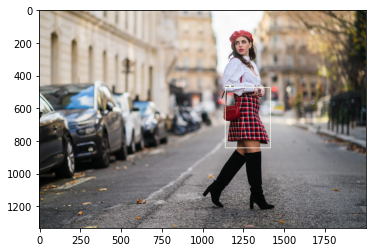

[0.97928065 0.09179226 0.08036903 0.07355359 0.06653133 0.06408119
 0.06345549 0.06172958 0.05640781 0.05236581 0.05141997 0.05038851
 0.02934819 0.02780762 0.02546966 0.02519792 0.02328596 0.02314803
 0.02192482 0.02084339 0.02081919 0.02067566 0.01914635 0.01911646
 0.01889265 0.01852623 0.01771292 0.01746112 0.01609269 0.01555172
 0.01546744 0.01543462 0.01477239 0.01449221 0.01448897 0.01448202
 0.01394266 0.01381424 0.01362899 0.01357099 0.01340291 0.01336014
 0.01325718 0.01288792 0.01266831 0.01255861 0.01253578 0.01250628
 0.01240513 0.01170766 0.01169604 0.01161382 0.01150566 0.01145288
 0.01140359 0.01136711 0.01124844 0.01096436 0.01075074 0.01071683
 0.01068619 0.01064479 0.01026458 0.01024672 0.01001599 0.00986388
 0.00983039 0.00970635 0.00949463 0.00948924 0.00946417 0.00942051
 0.0094102  0.00936782 0.00932637 0.00916705 0.00893664 0.00892341
 0.00889775 0.0088405  0.00881726 0.00877917 0.00877786 0.00873375
 0.00859973 0.00859284 0.00858903 0.00851795 0.00848034 0.0084

In [33]:
img = cv2.imread(IMAGE_PATH6)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.40,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()
print(detections['detection_scores'], label_id_offset)

# 10. Real Time Detections from your Webcam

In [ ]:
!pip uninstall opencv-python-headless -y

In [ ]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

# 10. Freezing the Graph

In [28]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')

In [29]:
command = "python {} --input_type=image_tensor --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(FREEZE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['OUTPUT_PATH'])

In [30]:
print(command)

python Tensorflow/models/research/object_detection/exporter_main_v2.py  --input_type=image_tensor --pipeline_config_path=Tensorflow/workspaceInnot/models/mainModel02/pipeline.config --trained_checkpoint_dir=Tensorflow/workspaceInnot/models/mainModel02 --output_directory=Tensorflow/workspaceInnot/models/mainModel02/export


In [31]:
!{command}

2022-07-08 20:22:50.117450: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-08 20:22:50.117466: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-08 20:22:51.355524: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 20:22:51.355721: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/

# 11. Conversion to TFJS

In [24]:
!pip install tensorflowjs

You should consider upgrading via the '/home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/bin/python -m pip install --upgrade pip' command.


In [32]:
command = "tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default {} {}".format(os.path.join(paths['OUTPUT_PATH'], 'saved_model'), paths['TFJS_PATH'])

In [33]:
print(command)

tensorflowjs_converter --input_format=tf_saved_model --output_node_names='detection_boxes,detection_classes,detection_features,detection_multiclass_scores,detection_scores,num_detections,raw_detection_boxes,raw_detection_scores' --output_format=tfjs_graph_model --signature_name=serving_default Tensorflow/workspaceInnot/models/mainModel02/export/saved_model Tensorflow/workspaceInnot/models/mainModel02/tfjsexport


In [34]:
!{command}

2022-07-08 20:27:25.792613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-08 20:27:25.792630: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-08 20:27:26.734689: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 20:27:26.734864: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/

In [ ]:
# Test Code: https://github.com/nicknochnack/RealTimeSignLanguageDetectionwithTFJS

# 12. Conversion to TFLite

In [35]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')

In [36]:
command = "python {} --pipeline_config_path={} --trained_checkpoint_dir={} --output_directory={}".format(TFLITE_SCRIPT ,files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'], paths['TFLITE_PATH'])

In [37]:
print(command)

python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py  --pipeline_config_path=Tensorflow/workspaceInnot/models/mainModel02/pipeline.config --trained_checkpoint_dir=Tensorflow/workspaceInnot/models/mainModel02 --output_directory=Tensorflow/workspaceInnot/models/mainModel02/tfliteexport


In [38]:
!{command}

2022-07-08 20:28:56.936537: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-08 20:28:56.936554: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-08 20:28:58.171685: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 20:28:58.171867: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/

In [39]:
FROZEN_TFLITE_PATH = os.path.join(paths['TFLITE_PATH'], 'saved_model')
TFLITE_MODEL = os.path.join(paths['TFLITE_PATH'], 'saved_model', 'detect.tflite')

In [40]:
command = "tflite_convert \
--saved_model_dir={} \
--output_file={} \
--input_shapes=1,300,300,3 \
--input_arrays=normalized_input_image_tensor \
--output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' \
--inference_type=FLOAT \
--allow_custom_ops".format(FROZEN_TFLITE_PATH, TFLITE_MODEL, )

In [41]:
print(command)

tflite_convert --saved_model_dir=Tensorflow/workspaceInnot/models/mainModel02/tfliteexport/saved_model --output_file=Tensorflow/workspaceInnot/models/mainModel02/tfliteexport/saved_model/detect.tflite --input_shapes=1,300,300,3 --input_arrays=normalized_input_image_tensor --output_arrays='TFLite_Detection_PostProcess','TFLite_Detection_PostProcess:1','TFLite_Detection_PostProcess:2','TFLite_Detection_PostProcess:3' --inference_type=FLOAT --allow_custom_ops


In [42]:
!{command}

2022-07-08 20:29:28.566170: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/Innot/TFODCourse/tfod/lib/python3.10/site-packages/cv2/../../lib64:
2022-07-08 20:29:28.566189: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-08 20:29:29.411467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-08 20:29:29.411646: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/simon/Simon/Hochschule/

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')